<h2>1. Importing libraries and data<h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#ensures that the graphs are displayed within the notebook 

%matplotlib inline

In [3]:
path = '/Users/bentley/Documents/Documents - Bentley I/Bentley/Portfolio/Hausverkäufe'

In [4]:
houses = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'houses_data_clean.csv'))

<h2>2. Data Cleaning<h2>

In [5]:
houses.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

In [6]:
#create a list of necessary columns
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long']

In [7]:
houses.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045
5,5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,2001,98053,47.6561,-122.005
6,6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1995,98003,47.3097,-122.327
7,7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1963,98198,47.4095,-122.315
8,8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1960,98146,47.5123,-122.337
9,9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,2003,98038,47.3684,-122.031


In [8]:
#remove unamed columns

houses = houses.drop(columns = ['Unnamed: 0'])

In [9]:
houses.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,2001,98053,47.6561,-122.005
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1995,98003,47.3097,-122.327
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1963,98198,47.4095,-122.315
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1960,98146,47.5123,-122.337
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,2003,98038,47.3684,-122.031


In [10]:
houses.shape

(21612, 16)

In [11]:
#rename the columns 

houses.rename(columns = {'sqft_living' : 'living_sqft', 'sqft_lot': 'lot_sqft', 'yr_built': 'built' }, inplace = True)

Missing Values...

In [12]:
#check for missing values

houses.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
living_sqft    0
lot_sqft       0
floors         0
waterfront     0
view           0
condition      0
grade          0
built          0
zipcode        0
lat            0
long           0
dtype: int64

Duplicates Check...

In [13]:
dups = houses.duplicated()

In [14]:
dups.shape

(21612,)

Extreme Values Checks...

/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_13758/2253558017.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses['price'], bins=50)
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

<Axes: xlabel='price', ylabel='Density'>

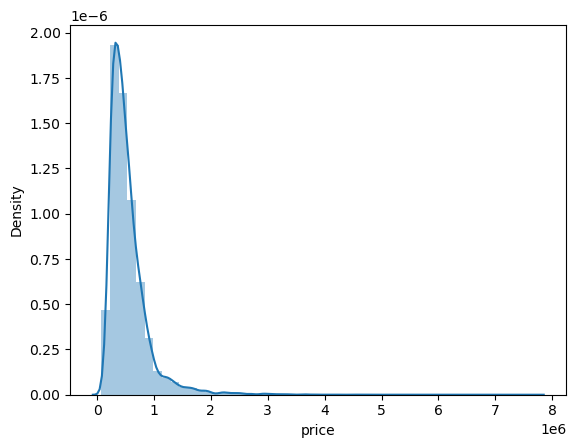

In [21]:
#shows extreme values

sns.distplot(houses['price'], bins=50) 

In [22]:
#check the mean

houses['price'].mean() 

540083.5187858597

In [23]:
#check the median

houses['price'].median() 

450000.0

In [24]:
#check the max

houses['price'].max() 

7700000.0

<h2>3. Data Preperation: Regression Analysis<h2>

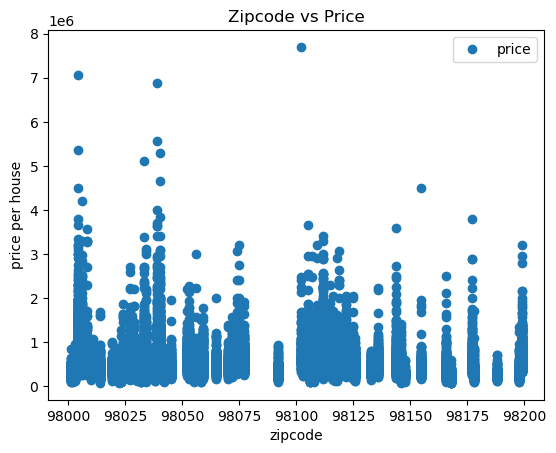

In [26]:
#create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

houses.plot(x = 'zipcode', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Zipcode vs Price')  
plt.xlabel('zipcode')  
plt.ylabel('price per house')  
plt.show()

In [27]:
#reshape the variables into NumPy arrays and put them into separate objects.

X = houses['zipcode'].values.reshape(-1,1)
y = houses['price'].values.reshape(-1,1)

In [29]:
#split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h2>4. Regression Analysis<h2>

In [30]:
#create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
#fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
#predict the values of y using X.

y_predicted = regression.predict(X_test)

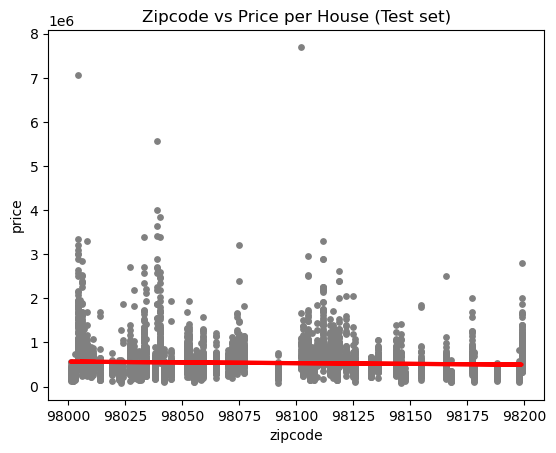

In [33]:
#create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Zipcode vs Price per House (Test set)')
plot_test.xlabel('zipcode')
plot_test.ylabel('price')
plot_test.show()

In [34]:
#create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
#print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-331.80899439]]
Mean squared error:  146822490876.4652
R2 score:  0.003228737997348241


In [36]:
y_predicted

array([[561742.73295333],
       [546147.71021677],
       [546479.51921117],
       ...,
       [554111.12608225],
       [562738.15993651],
       [560083.68798136]])

In [37]:
#create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,900000.0,561742.732953
1,405000.0,546147.710217
2,780000.0,546479.519211
3,379950.0,553779.317088
4,1061600.0,538847.912340
5,627000.0,546479.519211
6,279000.0,562738.159937
7,453000.0,508653.293850
8,290000.0,554442.935077
9,792000.0,538847.912340


Compare how regression fits training set...

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-331.80899439]]
Mean squared error:  129087577965.53464
R2 score:  0.0024319387703145567


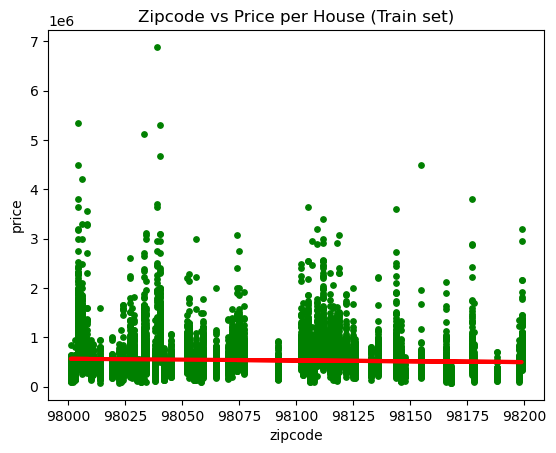

In [41]:
#visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Zipcode vs Price per House (Train set)')
plot_test.xlabel('zipcode')
plot_test.ylabel('price')
plot_test.show()

It would probably have been better to chose a different variable such as bedrooms vs price or living_sqft vs price besides zipcode vs price to present a accurate model...